# Load packages

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Showing results for fishing, cargo and tanker vessels

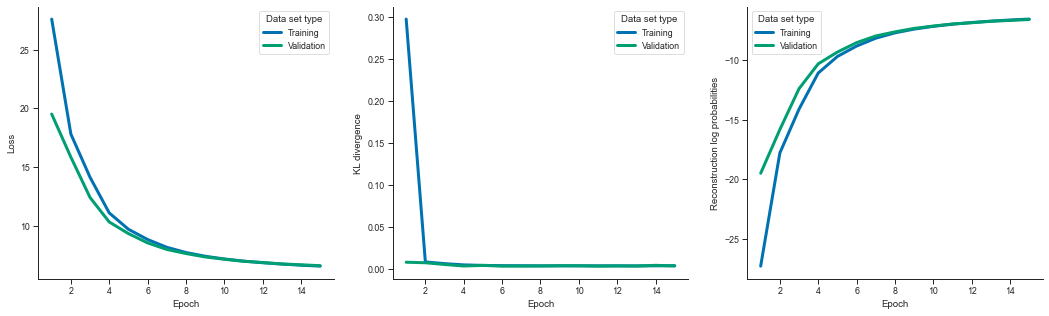

In [2]:
# Use the SummaryModels class
file_name = "RegionSkagen_01062019_30092019_FishCargTank_14400_86400_600"
summary_models = SummaryModels(file_name)
df_default = summary_models.load_curves_df("Default")
summary_models.plot_curves(df_default)

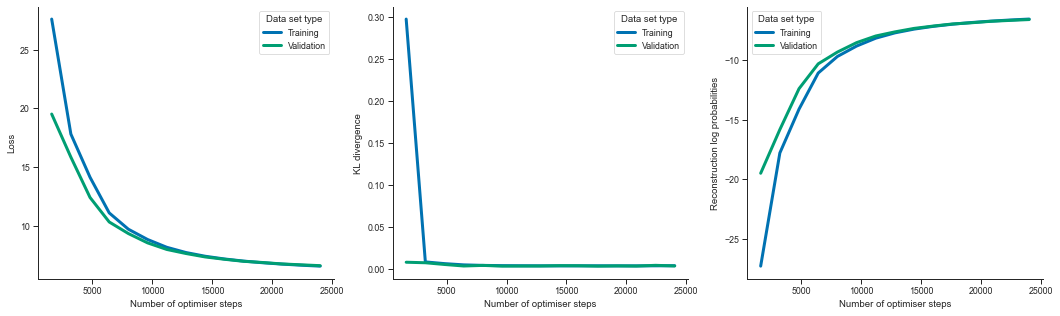

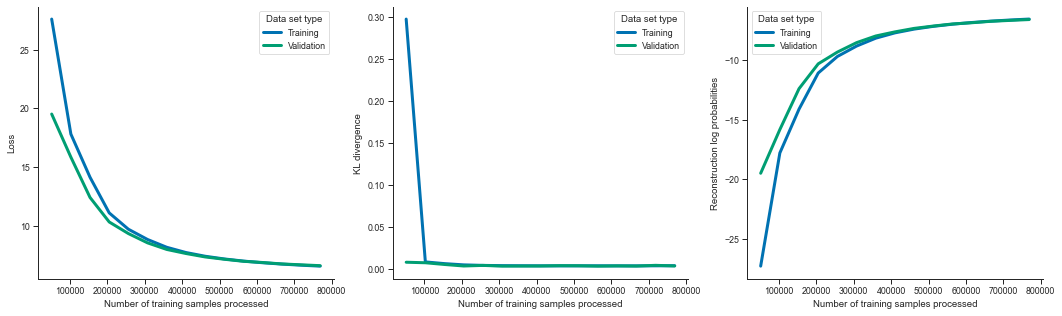

In [3]:
# Plot the same things as above, but with optimizer steps and number of processed training samples on the x-axis
summary_models.plot_curves(summary_models.load_curves_df("Default", level="Step"), x="Number of optimiser steps")
summary_models.plot_curves(summary_models.load_curves_df("Default", level="Sample"), x="Number of training samples processed")

# Trajectory based reconstruction log probabilities
Plot histograms of the validation trajectory based reconstruction log probabilities (by ship type)

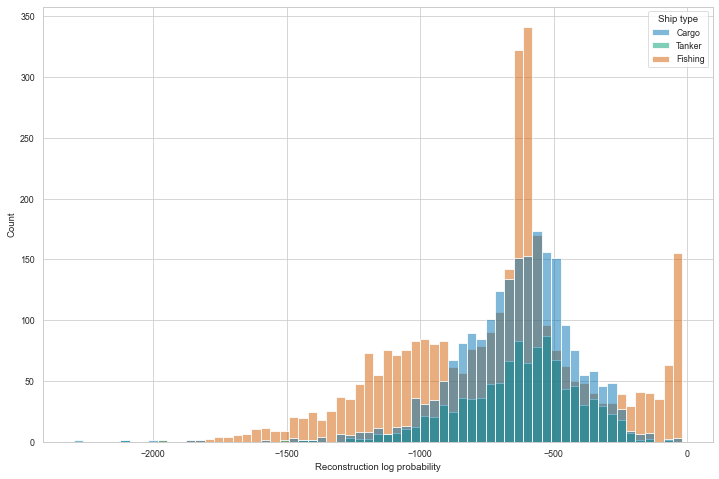

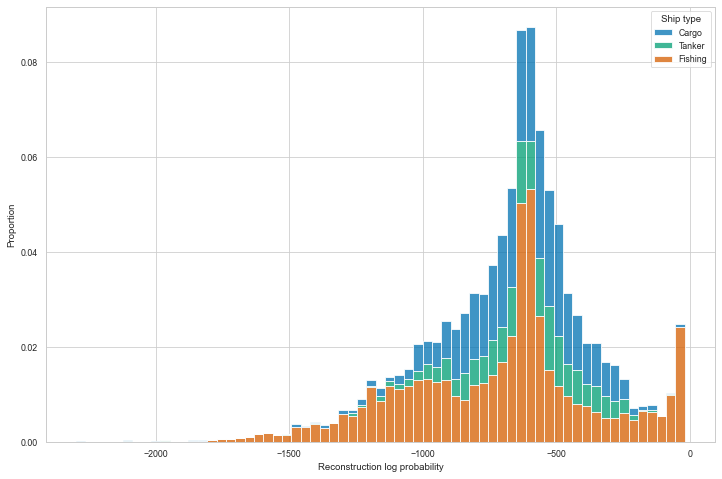

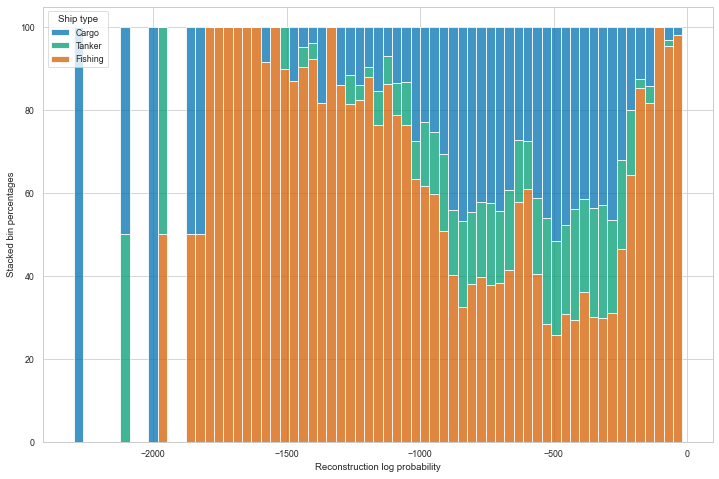

Mean Reconstruction log probability: -672.7742030927803
Median Reconstruction log probability: -629.3667602539062
Reconstruction log probability statistics by ship type: 
            count        mean         std          min         25%  \
Ship type                                                            
Cargo      2131.0 -638.847890  223.089350 -2298.531982 -762.939697   
Fishing    3248.0 -709.408190  361.275296 -1976.653564 -962.117767   
Tanker     1031.0 -627.487862  221.236933 -2108.836914 -752.961700   

                  50%         75%        max  
Ship type                                     
Cargo     -615.062256 -500.640152 -25.504671  
Fishing   -644.162445 -537.235199 -18.811722  
Tanker    -605.600525 -488.921295 -86.359856  


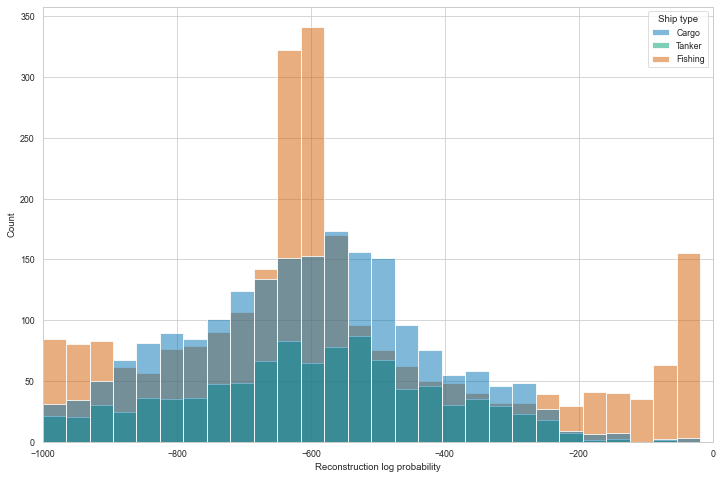

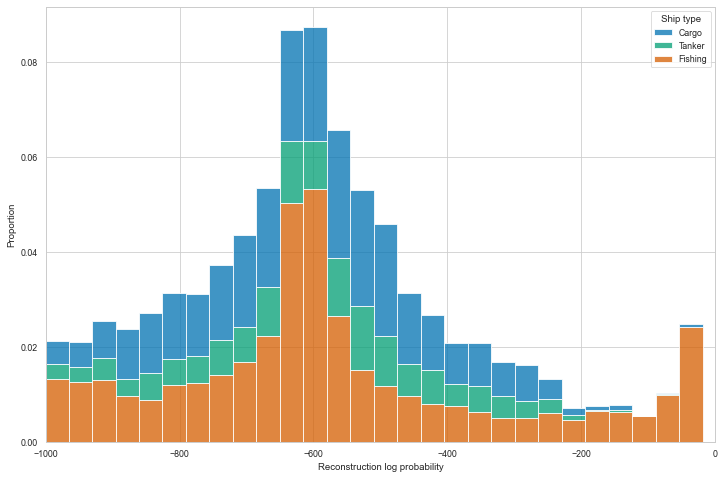

Mean Reconstruction log probability: -672.7742030927803
Median Reconstruction log probability: -629.3667602539062
Reconstruction log probability statistics by ship type: 
            count        mean         std          min         25%  \
Ship type                                                            
Cargo      2131.0 -638.847890  223.089350 -2298.531982 -762.939697   
Fishing    3248.0 -709.408190  361.275296 -1976.653564 -962.117767   
Tanker     1031.0 -627.487862  221.236933 -2108.836914 -752.961700   

                  50%         75%        max  
Ship type                                     
Cargo     -615.062256 -500.640152 -25.504671  
Fishing   -644.162445 -537.235199 -18.811722  
Tanker    -605.600525 -488.921295 -86.359856  


In [4]:
summary_models = SummaryModels(file_name)
data = summary_models.run_evaluation()["TrajectoryLevelData"]
x = "Reconstruction log probability"
hue = "Ship type"
hue_order = ["Cargo", "Tanker", "Fishing"]

# Plot trajectory based reconstruction log probabilities
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order,
                                 stat="normalized_each_bin", ylabel="Stacked bin percentages", print_summary_stats=True)

# Zoom in 
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order, xlim=[-1000, 0])
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order, 
                                 xlim=[-1000, 0], print_summary_stats=True)

# Equally weighted (point based) reconstruction log probabilities
Divide the trajectory based reconstruction log probabilities by the corresponding trajectory length and plot the same histograms as above

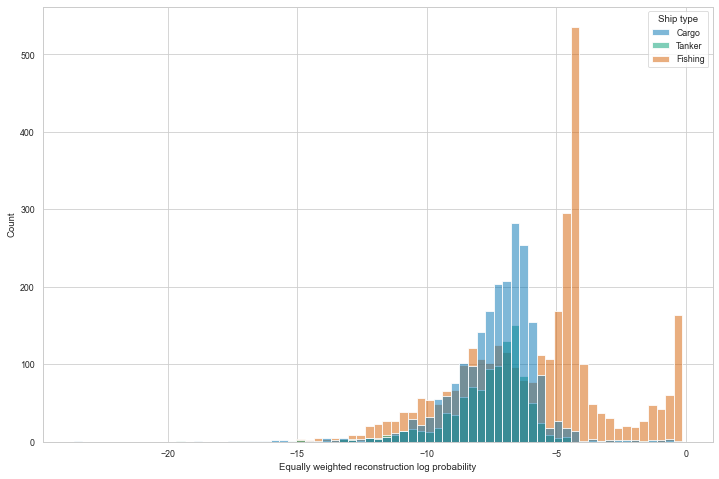

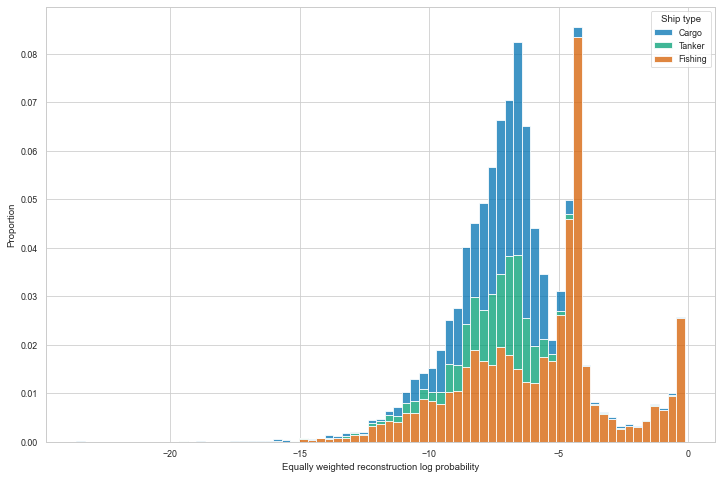

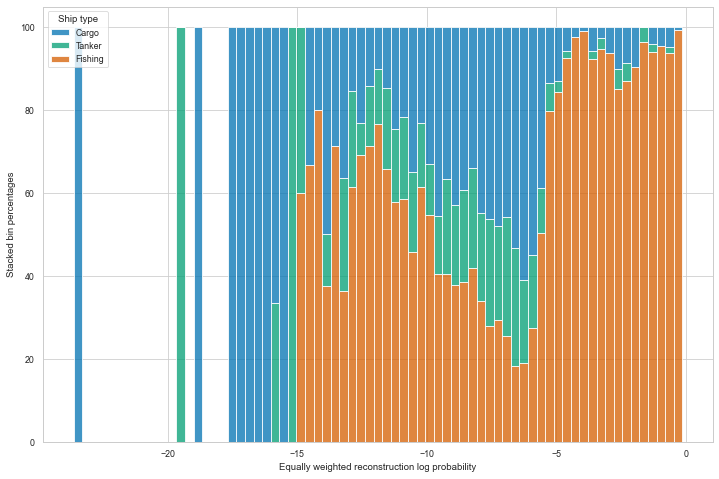

Mean Equally weighted reconstruction log probability: -6.585730171633932
Median Equally weighted reconstruction log probability: -6.697517183091906
Equally weighted reconstruction log probability statistics by ship type: 
            count      mean       std        min       25%       50%  \
Ship type                                                              
Cargo      2131.0 -7.348883  1.698125 -23.636118 -8.087306 -7.051730   
Fishing    3248.0 -5.768637  2.879420 -14.950238 -7.794002 -5.132374   
Tanker     1031.0 -7.582472  1.624064 -19.347128 -8.280959 -7.273697   

                75%       max  
Ship type                      
Cargo     -6.343888 -0.177116  
Fishing   -4.254744 -0.130637  
Tanker    -6.591794 -0.664307  


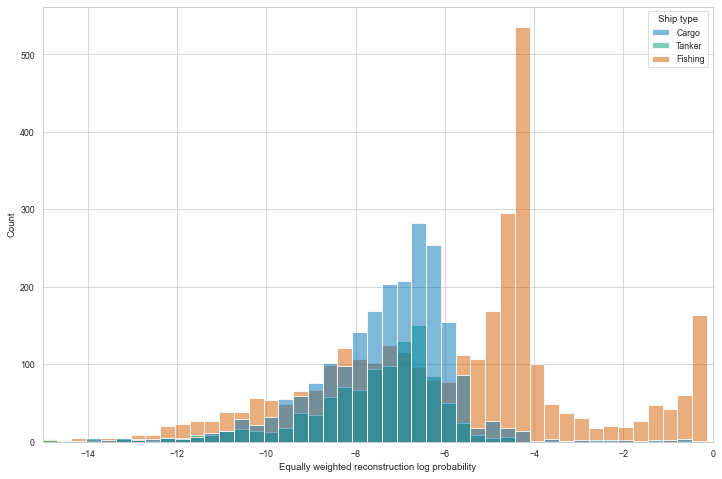

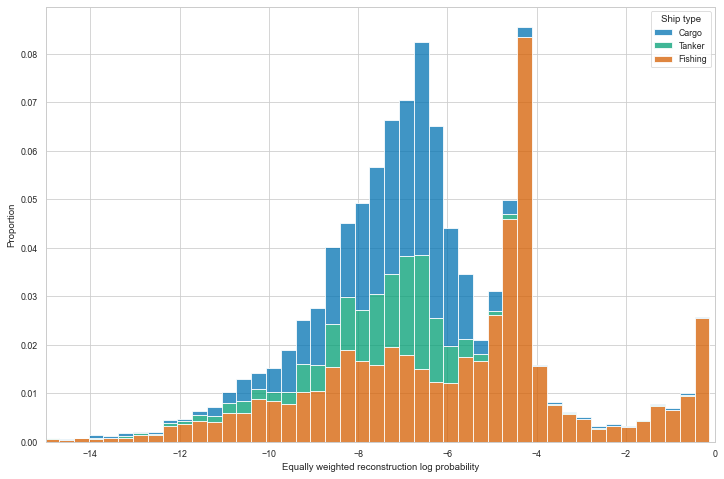

Mean Equally weighted reconstruction log probability: -6.585730171633932
Median Equally weighted reconstruction log probability: -6.697517183091906
Equally weighted reconstruction log probability statistics by ship type: 
            count      mean       std        min       25%       50%  \
Ship type                                                              
Cargo      2131.0 -7.348883  1.698125 -23.636118 -8.087306 -7.051730   
Fishing    3248.0 -5.768637  2.879420 -14.950238 -7.794002 -5.132374   
Tanker     1031.0 -7.582472  1.624064 -19.347128 -8.280959 -7.273697   

                75%       max  
Ship type                      
Cargo     -6.343888 -0.177116  
Fishing   -4.254744 -0.130637  
Tanker    -6.591794 -0.664307  


In [5]:
x = "Equally weighted reconstruction log probability"
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order,
                                 stat="normalized_each_bin", ylabel="Stacked bin percentages", print_summary_stats=True)

# Zoom in 
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order, xlim=[-15, 0])
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order, 
                                 xlim=[-15, 0], print_summary_stats=True)

In [6]:
# Look at some length statistics
data.groupby("Ship type")["Length"].describe()

,count,mean,std,min,25%,50%,75%,max
Ship type,,,,,,,,
Cargo,2131.0,89.357109,28.989728,25.0,74.0,88.0,110.0,144.0
Fishing,3248.0,127.223830,27.214499,25.0,126.0,139.0,143.0,144.0
Tanker,1031.0,85.694471,30.023304,25.0,68.5,86.0,103.0,144.0
